In [2]:
''' 
Chapter One Benchmarking and Profiling. Profiliung is the rechnique that allows us to pinpoint most resource-intensive spots in
an application A profiler is a program that runs an application and monitors how long each function takes to execute.
BENCHMARKS: Are small scripts used to access the total execution time of your aplication

The mantra here is 
* Make it run, Make it right, Make it fast.
'''
# we will by designing the application in an obnject-oriantatied way.
class Particle:
    def __init__(self, x, y, ang_vel): # we accept + and - numbers for all paramenters
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
        

# The full ParticleSimulation implementation:


class ParticleSimulator:

    def __init__(self, particles):
        self.particles = particles

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        for i in range(nsteps):
            for p in self.particles:
                # 1. calculate the direction
                norm = (p.x**2 + p.y**2) ** 0.5
                v_x = -p.y/norm
                v_y = p.x/norm

                #2. calculate the displacement
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y

                p.x += d_x ; p.y += d_y
                # 3. repeat for all the time steps


In [3]:
from matplotlib import pyplot as plt 
from matplotlib import animation

def visualize(simulator):
    
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]

    fig = plt.figure()

    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    def init():
        line.set_data([], [])
        return line, # the coma is important!

    def animate(i):
        # We let the particle evolve for 0.01 time units

        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]

        line.set_data(X, Y)
        return line,
    


    anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    
    plt.show()

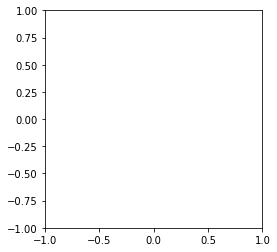

In [4]:
def test_visualize():
    particles = [Particle(0.3, 0.5, 1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, 3)]
    
    simulator = ParticleSimulator(particles)
    visualize(simulator)

if __name__ == '__main__':
    test_visualize()

In [5]:
# Writing better tests and benchmarks with pytest-benchmark:

def test_evolve():
    particles = [Particle(0.3, 0.5, +1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]
    
    simulator = ParticleSimulator(particles)

    simulator.evolve(0.1)
    p0, p1, p2 = particles

    def fequal(a, b, eps=1e-5):
        return abs(a - b) < eps 

    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)

    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)

    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)


In [6]:
import cProfile

pr =  cProfile.Profile()

pr.enable()

benchmark()

pr.disable()

pr.print_stats()

NameError: name 'benchmark' is not defined

In [7]:
''' 
Optimizing our code 
Now that we have identified where exactly our app is spending most its time, make some changes and assess the change is performance.

To express the equations of motion in terms of radius, r, and angle , alpha. (instead of x and y)
then calculate the points on a circle using the following equation
'''
r = 11

alpha = 7 
from math import cos, sin

x = r * cos(alpha)

y = r * sin(alpha)



In [8]:
def (self, dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    # Loop order is changed
    for p in self.particles:
        t_x_ang = timestep * p.ang_vel
        for i in range(nsteps):
            norm = (p.x**2 + p.y**2)**0.5
            p.x, p.y = (p.x - t_x_ang * p.y/norm,
                        p.y + t_x_ang * p.x/norm)


SyntaxError: invalid syntax (Temp/ipykernel_26960/1428581420.py, line 1)

In [9]:
evolve_fast(self, dt) 

NameError: name 'evolve_fast' is not defined

In [10]:
# The dis module: to inspect how the code is converted to bytecode, we can use the dis module

import dis

# will print for each line in the function, a list of bytecode instructions.

dis.dis(ParticleSimulator.evolve)[2]

 26           0 LOAD_CONST               1 (1e-05)
              2 STORE_FAST               2 (timestep)

 27           4 LOAD_GLOBAL              0 (int)
              6 LOAD_FAST                1 (dt)
              8 LOAD_FAST                2 (timestep)
             10 BINARY_TRUE_DIVIDE
             12 CALL_FUNCTION            1
             14 STORE_FAST               3 (nsteps)

 28          16 SETUP_LOOP             134 (to 152)
             18 LOAD_GLOBAL              1 (range)
             20 LOAD_FAST                3 (nsteps)
             22 CALL_FUNCTION            1
             24 GET_ITER
        >>   26 FOR_ITER               122 (to 150)
             28 STORE_FAST               4 (i)

 29          30 SETUP_LOOP             116 (to 148)
             32 LOAD_FAST                0 (self)
             34 LOAD_ATTR                2 (particles)
             36 GET_ITER
        >>   38 FOR_ITER               106 (to 146)
             40 STORE_FAST               5 (p)

 31    

TypeError: 'NoneType' object is not subscriptable

In [13]:
# Pure Python Optimizations 
 
n = list(range(15))
display(n)

for i, _ in enumerate(n):
    n[i] += 1

display(n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [15]:
# bisect module allows fast searches on sorted arrays. 
# The bisect.bisect function can be used on a sorted list to find the index to place and elemnet 
# while maintaining the array in sorted order

import bisect

collection = [1, 2, 4, 5, 6]

# This function uses the binary search algo with O(log(N)) running time. 
# running time will increase by a constant amount every time you double your input size.

bisect.bisect(collection, 3)

2

In [16]:
"""
If value we are trying to insert is already present in list. the function will return location after
already present value. Therefore, we can use the bisect.bisect_left variant, returning correct index.
"""

def index_bisect(a, x):
    'Locate the leftmost value exactly equal to a'
    i = bisect.bisect_left(a,  x)
    if i != len(a) and a[i] == x:
        return i
        raise ValueError

In [20]:
"""
Dictionaries: extremely versatile and extensively used in the py language.
Dictionaries are implemented as hash maps
""" 

display(hash('hello'))


# To restrict the number to be a certain range use (%) operator

display(hash('hello') % 10)

647163784322000273

3

In [21]:
"""
A dictionary can be used to efficiently count unique elements in a list.
In this example, we define the counter_dict function that takes a list
returning a dict containing the nunber of occurrences of each value in the list.
"""

def counter_dict(items):
    counter = {}
    for item in items:
        if item not in counter:
            counter[item] = 1
        else:
            counter[item] += 1
        return counter


In [22]:
"""
The code can be simplified using collections.defaultdict.
Will produce dictionaries where each new key is automatically assigned a default value
"""

from collections import defaultdict

def counter_defaultdict(items):
    counter = defaultdict(int)
    for item in items:
        counter[item] += 1
    return counter

In [31]:
"""
The collections module also includes a Counter class that can be used for the same purpose

"""
items = range(10)
from collections import Counter

counter = Counter(items)
counter

Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [39]:
"""
Bulding an in-memory search index using a hash map
Ditionaries can be used to quickly search for a word in a list docs, similar to search engine.
build an inverted index based on a dictionary of lists
"""
docs = ['the cat is under the table',
        'the dog is under the table',
        'cats and dogs smell roses'
        'Carla eats an apple']

# simple way to retrieve all documents that match a query is scan each document and test for the presence of a word

matches = [doc for doc in docs if 'table' in doc]

matches

['the cat is under the table', 'the dog is under the table']

In [44]:
# building and index
index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in the document
    for word in doc.split():
        # We build a list containing the indices, where term appears
        if word not in index:
            index[word] = [i]
        else:
            index[word].append(i)

# After bulding index, doing a query is a simple dic look up.

index_result = index['table']
display(index_result)

result_documents = [docs[i] for i in index_result]
display(result_documents)


[0, 1]

['the cat is under the table', 'the dog is under the table']

In [76]:
# Sets: cointain only unique elements.

#x = list(range(500)) + list(range(500))

x_solo = set(['javier', 'javier'])

x_solo

{'javier'}

In [77]:
# Building an index using sets

index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in documents
    for word in doc.split():
        # build a set containing the indices, where term appears
        if word not in index:
            index[word] = {i}
        else:
            index[word].add(i)
# Querying the documents containing both 'cat' and 'table'
index['cat'].intersection(index['table'])

{0}

In [86]:
# Heaps: built using the procedures contained in haepq module on an underlying list.

import heapq

heapq_collection =  [10, 3, 3, 4,  5, 6]

heapq.heapify(heapq_collection)

display(heapq_collection)

# To perform insertion and extraction operations on  the heap we can use the heapq.heappush and heapq.heappop
# function will extract the min val in collection in O(log(N)) time 

display(heapq.heappop(heapq_collection))

# Similarly, you can push with

heapq.heappush(heapq_collection, 1991)


display(heapq_collection)


[3, 3, 6, 4, 5, 10]

3

[3, 4, 6, 10, 5, 1991]

In [87]:
"""
Another optionis queue.PriorityQueue class that,is thread and process-safe.
The PriorityQueue class can be filled up with using the PriorityQueue.put method,
while PriorityQueue.get can be used to be extract the minimin value in collection
"""

from queue import PriorityQueue

queue = PriorityQueue()
for element in collection:
    queue.put(element)

queue.get()

6

In [89]:
queue = PriorityQueue()
queue.put((3, "priority 3"))
queue.put((2, "priority 2"))
queue.put((1, "priority 1"))

queue.get()


(1, 'priority 1')

In [97]:
# Tries(sometimes called a prefix tree).
# Tries are extremely fast at matching a list of strings against a prefix.


from random import choice
from string import ascii_uppercase
from patricia import trie

def random_string(length):
    '''Produce a random string made of *length* uppercase ascii chars'''
    return ''.join(choice(ascii_uppercase) for i in range(length))

In [98]:
strings = [random_string(32) for i in range(500)]

matches = [s for s in strings if s.startswith('AA')]

# List comprehension and str.startwith are already very optimized operations

%timeit [s for s in strings if s.startswith('AA')]

96 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [101]:
strings_dict = {s:0 for s in strings}

# A dictionary where all values are 0

strings_trie = trie(**strings_dict)

# To query patricia-trie for a matching prefix

iterMatches = list(strings_trie.iter('AA'))

# Now we time 

%timeit list(strings_trie.iter('AA'))

6.22 µs ± 73.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
from matplotlib import pyplot as plt
from matplotlib import animation
from random import uniform
import timeit

class Particle:

    __slots__ = ('x', 'y', 'ang_speed')

    def __init__(self, x, y, ang_speed):
        self.x = x
        self.y = y
        self.ang_speed = ang_speed


class ParticleSimulator:

    def __init__(self, particles):
        self.particles = particles

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)

        for i in range(nsteps):
            for p in self.particles:

                norm = (p.x**2 + p.y**2)**0.5
                v_x = (-p.y)/norm
                v_y = p.x/norm

                d_x = timestep * p.ang_speed * v_x
                d_y = timestep * p.ang_speed * v_y

                p.x += d_x
                p.y += d_y

    # def evolve(self, dt):
    #     timestep = 0.00001
    #     nsteps = int(dt/timestep)

    #     # First, change the loop order
    #     for p in self.particles:
    #         t_x_ang = timestep * p.ang_speed
    #         for i in range(nsteps):
    #             norm = (p.x**2 + p.y**2)**0.5
    #             p.x, p.y = p.x - t_x_ang*p.y/norm, p.y + t_x_ang * p.x/norm

def visualize(simulator):

    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]

    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')

    # Axis limits
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    # It will be run when the animation starts
    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        # We let the particle evolve for 0.1 time units
        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]

        line.set_data(X, Y)
        return line,

    # Call the animate function each 10 ms
    anim = animation.FuncAnimation(fig,
                                   animate,
                                   init_func=init,
                                   blit=True,
                                   interval=10)
    plt.show()


def test_visualize():
    particles = [Particle( 0.3, 0.5, +1),
                 Particle( 0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]

    simulator = ParticleSimulator(particles)
    visualize(simulator)

def test_evolve():
    particles = [Particle( 0.3,  0.5, +1),
                 Particle( 0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]

    simulator = ParticleSimulator(particles)

    simulator.evolve(0.1)

    p0, p1, p2 = particles

    def fequal(a, b):
        return abs(a - b) < 1e-5

    assert fequal(p0.x, 0.2102698450356825)
    assert fequal(p0.y, 0.5438635787296997)

    assert fequal(p1.x, -0.0993347660567358)
    assert fequal(p1.y, -0.4900342888538049)

    assert fequal(p2.x,  0.1913585038252641)
    assert fequal(p2.y, -0.3652272210744360)


def benchmark():
    particles = [Particle(uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0))
                  for i in range(100)]

    simulator = ParticleSimulator(particles)
    simulator.evolve(0.1)


def timing():
    result = timeit.timeit('benchmark()',
                           setup='from __main__ import benchmark',
                           number=10)
    # Result is the time it takes to run the whole loop
    print(result)

    result = timeit.repeat('benchmark()',
                           setup='from __main__ import benchmark',
                           number=10,
                           repeat=3)
    # Result is a list of times
    print(result)


def benchmark_memory():
    particles = [Particle(uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0))
                  for i in range(100000)]

    simulator = ParticleSimulator(particles)
    simulator.evolve(0.001)


if __name__ == '__main__':
    benchmark()


In [34]:
benchmark()

In [35]:

def test_evolve(benchmark):
    particles = [Particle( 0.3,  0.5, +1),
                 Particle( 0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]

    simulator = ParticleSimulator(particles)

    simulator.evolve(0.1)

    p0, p1, p2 = particles

    def fequal(a, b):
        return abs(a - b) < 1e-5

    assert fequal(p0.x, 0.2102698450356825)
    assert fequal(p0.y, 0.5438635787296997)

    assert fequal(p1.x, -0.0993347660567358)
    assert fequal(p1.y, -0.4900342888538049)

    assert fequal(p2.x,  0.1913585038252641)
    assert fequal(p2.y, -0.3652272210744360)

    benchmark(simulator.evolve, 0.1)


In [37]:

test_evolve()

TypeError: test_evolve() missing 1 required positional argument: 'benchmark'